In [1]:
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
warnings.filterwarnings('ignore')


In [2]:
train = pd.read_csv('./train_u6lujuX_CVtuZ9i.csv')
print(train.head())


    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0   

In [3]:
test = pd.read_csv('./test_Y3wMUE5_7gLdaTN.csv')
print(test.head())
train_original = train.copy()
test_original = test.copy()


    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001015   Male     Yes          0      Graduate            No   
1  LP001022   Male     Yes          1      Graduate            No   
2  LP001031   Male     Yes          2      Graduate            No   
3  LP001035   Male     Yes          2      Graduate            No   
4  LP001051   Male      No          0  Not Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5720                  0       110.0             360.0   
1             3076               1500       126.0             360.0   
2             5000               1800       208.0             360.0   
3             2340               2546       100.0             360.0   
4             3276                  0        78.0             360.0   

   Credit_History Property_Area  
0             1.0         Urban  
1             1.0         Urban  
2             1.0         Urban  
3             NaN     

Now we understand the data by analysing column present in the dataset


In [4]:
# understand the data
print('#############Train Dataset###############')
print(train.columns)
# list of columns in the dataset
print(train.dtypes)
print('##################Test dataset#############')
print(test.columns)
print(test.dtypes)


#############Train Dataset###############
Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')
Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object
##################Test dataset#############
Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')
Loan_ID               object
Gender               

In [5]:
print("train data shape: ", train.shape)
print("test data shape: ", test.shape)


train data shape:  (614, 13)
test data shape:  (367, 12)


In [6]:
print(train['Loan_Status'].value_counts())
train['Loan_Status'].value_counts(normalize=True)


Y    422
N    192
Name: Loan_Status, dtype: int64


Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
None


<AxesSubplot:>

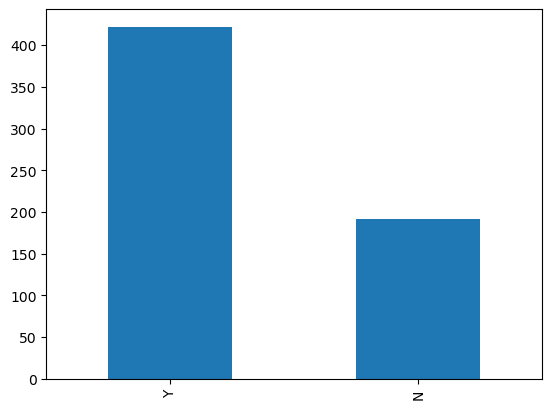

In [7]:
print(train.info())
train['Loan_Status'].value_counts().plot.bar()


Now we analyse each variable saparately


In [8]:
# categorical data
train.columns


Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

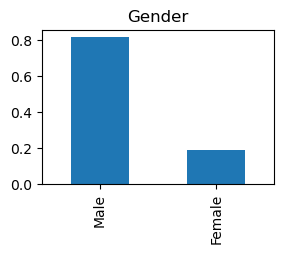

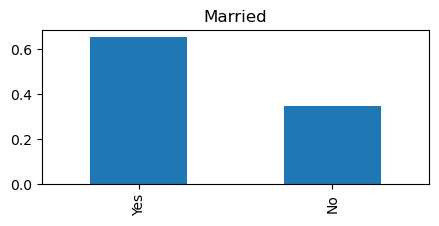

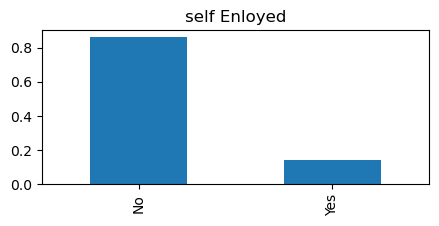

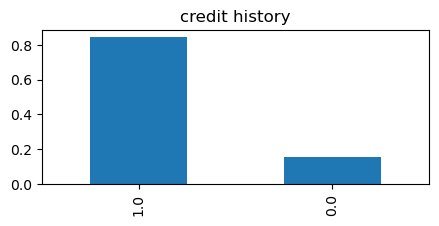

In [9]:
train['Gender'].value_counts(normalize=True).plot.bar(
    title='Gender', figsize=(3, 2))
plt.show()
train['Married'].value_counts(normalize=True).plot.bar(
    title='Married', figsize=(5, 2))
plt.show()
train['Self_Employed'].value_counts(normalize=True).plot.bar(
    title='self Enloyed', figsize=(5, 2))
plt.show()
train['Credit_History'].value_counts(normalize=True).plot.bar(
    title='credit history', figsize=(5, 2))
plt.show()


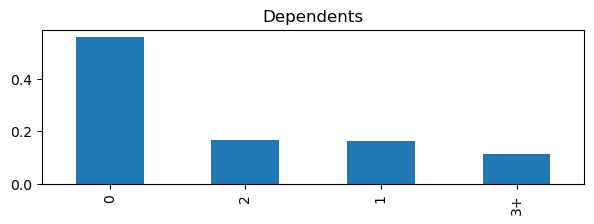

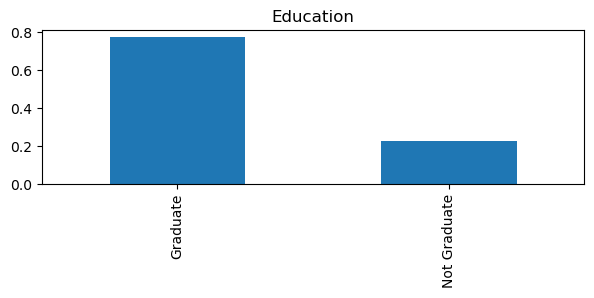

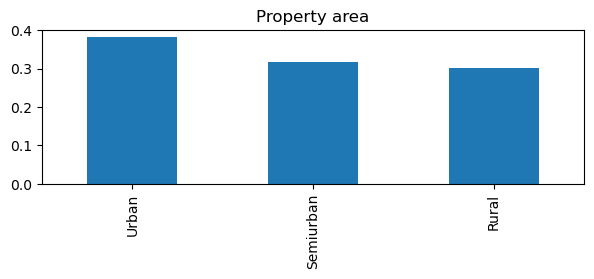

In [10]:
# ordinal data
test['Dependents'].value_counts(normalize=True).plot.bar(
    title='Dependents', figsize=(7, 2))

plt.show()
test['Education'].value_counts(normalize=True).plot.bar(
    title='Education', figsize=(7, 2))
plt.show()
test['Property_Area'].value_counts(normalize=True).plot.bar(
    title='Property area', figsize=(7, 2))
plt.show()


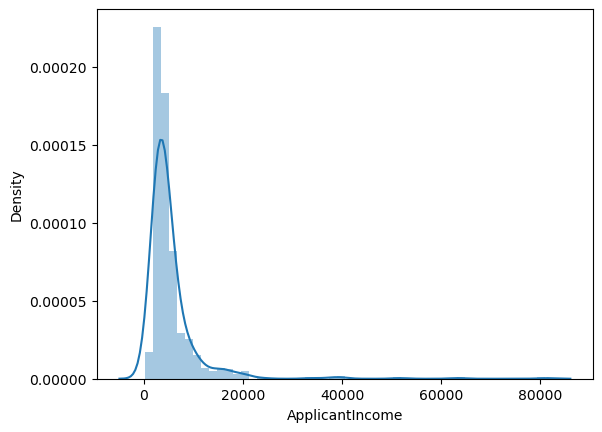

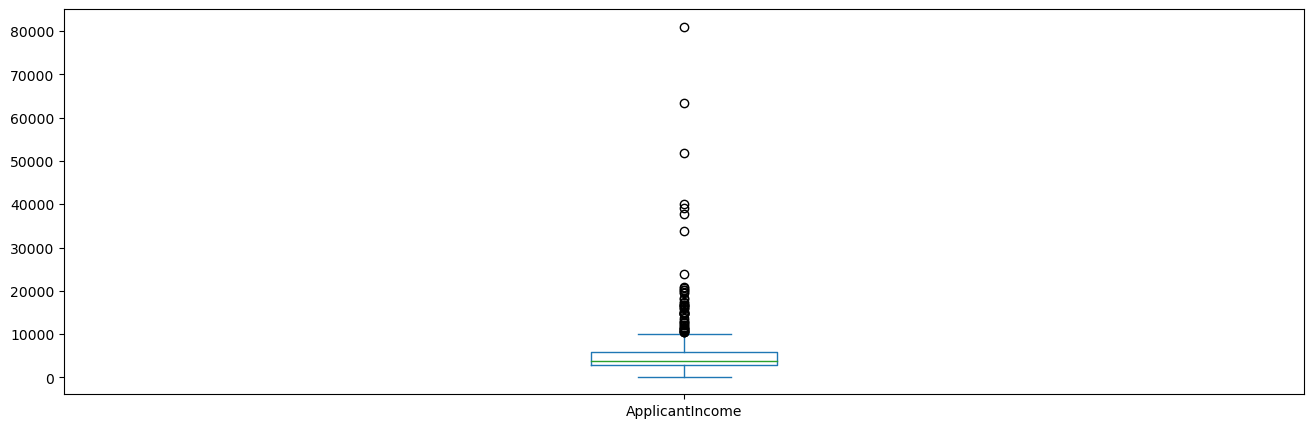

In [11]:
# numerical values
sns.distplot(train['ApplicantIncome'])
plt.show()
train['ApplicantIncome'].plot.box(figsize=(16, 5))
plt.show()

Distribution of data is towards left side which means it is positively skewed, we need to normalize the data

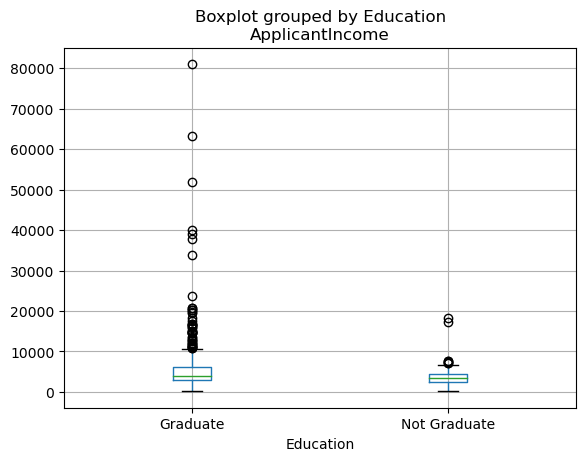

In [12]:
# segrigate on basis of education as their are outliners in the income which can be due to diff. in education 

train.boxplot(column='ApplicantIncome',by='Education')
# plt.suptitle('')
plt.show()

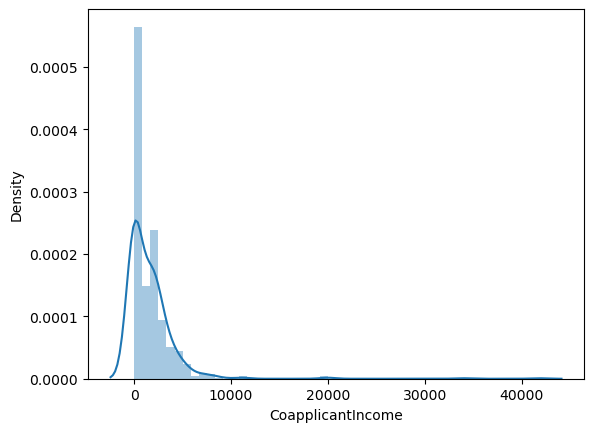

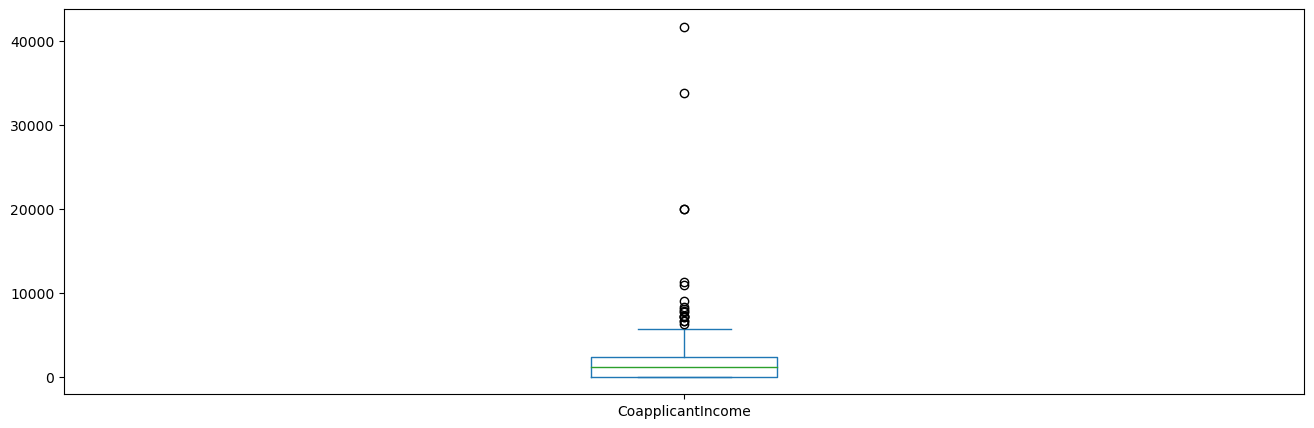

In [13]:
sns.distplot( train['CoapplicantIncome'])
plt.show()
train['CoapplicantIncome'].plot.box(figsize=(16,5))
plt.show()

In [14]:
train.notna()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,True,True,True,True,True,True,True,True,False,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,True,True,True,True,True,True,True,True,True,True,True,True,True
610,True,True,True,True,True,True,True,True,True,True,True,True,True
611,True,True,True,True,True,True,True,True,True,True,True,True,True
612,True,True,True,True,True,True,True,True,True,True,True,True,True


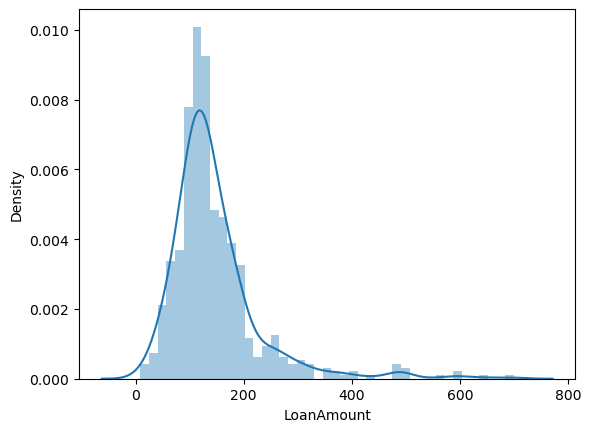

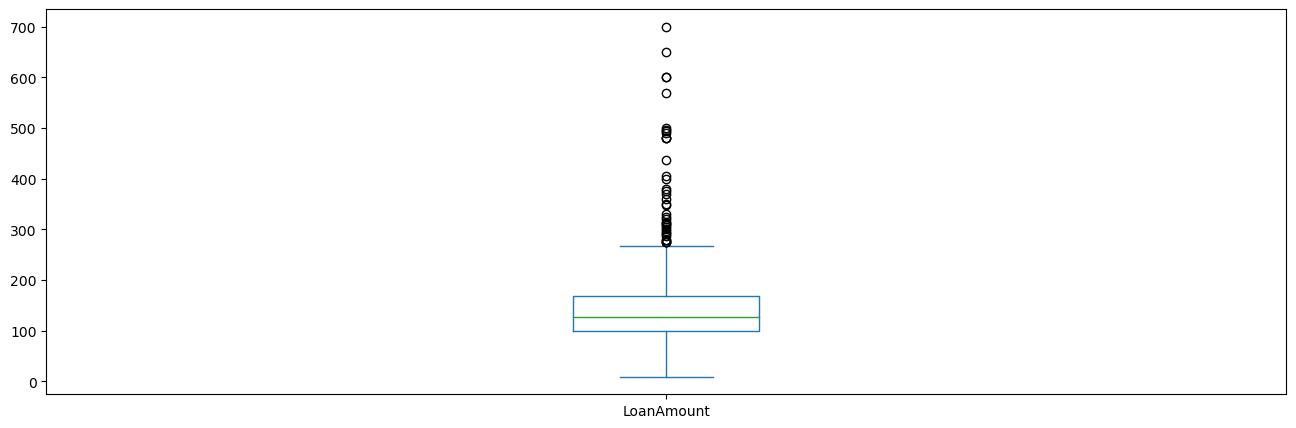

In [15]:
sns.distplot(train['LoanAmount'])
plt.show()
train['LoanAmount'].plot.box(figsize=(16,5))
plt.show()

**Bivariate analysis**: we analyse the relationship between two variables
Bivariate analysis means the analysis of bivariate data. It is one of the simplest forms of statistical analysis, used to find out if there is a relationship between two sets of values. It usually involves the variables X and Y. 

**Categorical vs Target variable**

Loan_Status    N    Y
Gender               
Female        37   75
Male         150  339


<function matplotlib.pyplot.show(close=None, block=None)>

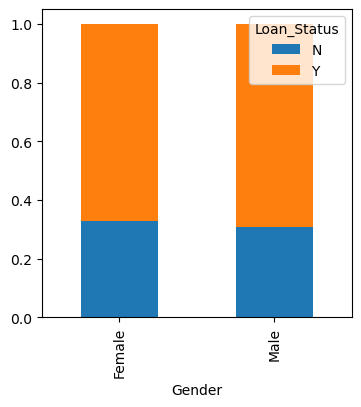

In [16]:
Gender= pd.crosstab(train['Gender'],train['Loan_Status'])
print(Gender)
Gender.div(Gender.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show

we can infer that proportion of male and female applicants are almost same

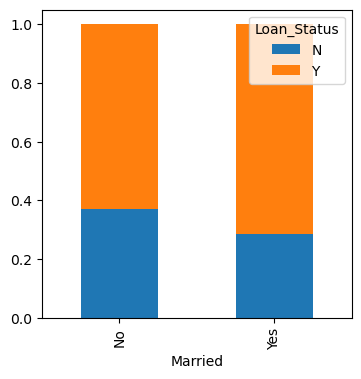

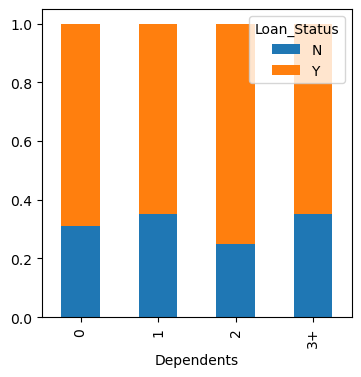

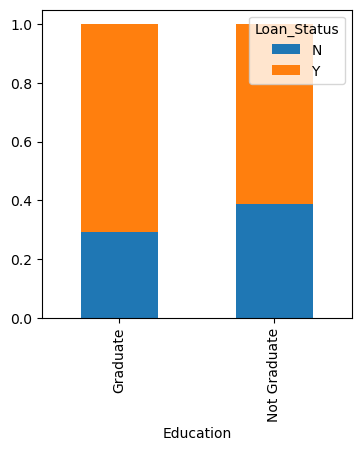

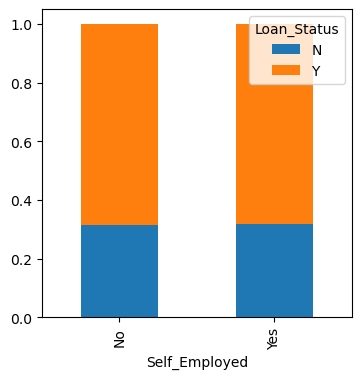

In [17]:
Married=pd.crosstab(train['Married'],train['Loan_Status'])
Dependents=pd.crosstab(train['Dependents'],train['Loan_Status'])
Education=pd.crosstab(train['Education'],train['Loan_Status'])
Self_Employed=pd.crosstab(train['Self_Employed'],train['Loan_Status'])
Married.div(Married.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()
Dependents.div(Dependents.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()
Education.div(Education.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()
Self_Employed.div(Self_Employed.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()

**Infered:**
1. Married has more chances of loan approval
2. graduates has more chances of loan approval
3. 1 or 3+  has same chances of loan approval
4. self Employement has same chances of loan approval

**Categorial vs Target variable**

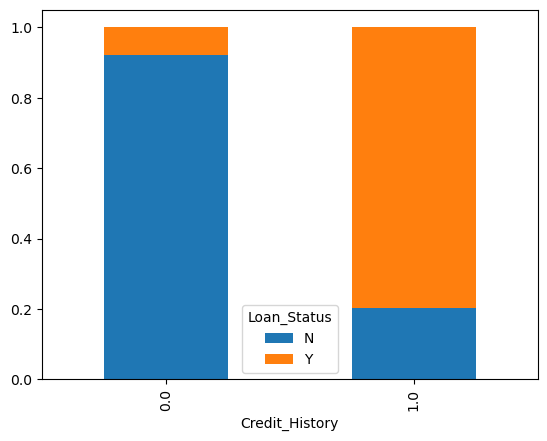

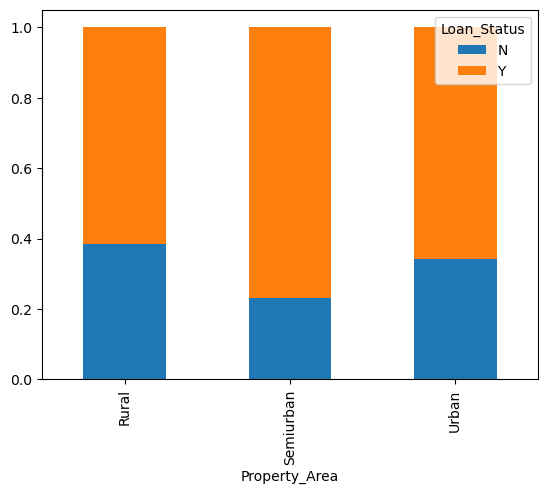

In [18]:
Credit_history=pd.crosstab(train['Credit_History'],train['Loan_Status'])
Property_Area=pd.crosstab(train['Property_Area'],train['Loan_Status'])
Credit_history.div(Credit_history.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
plt.show()
Property_Area.div(Property_Area.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
plt.show()
# print(Credit_history.sum(1).astype(float))
# print(Credit_history)

**Infered:**
- People with 1 has more chances of loan approval
- The Proportion of loans getting approved in semiurban area is higher as compared to that in rural or urban areas.

Credit_history.div(Credit_history.sum(1).astype(float),axis=0)
divides the credit history with total number of applicants

**Numerical vs Target variable**

<AxesSubplot:xlabel='Loan_Status'>

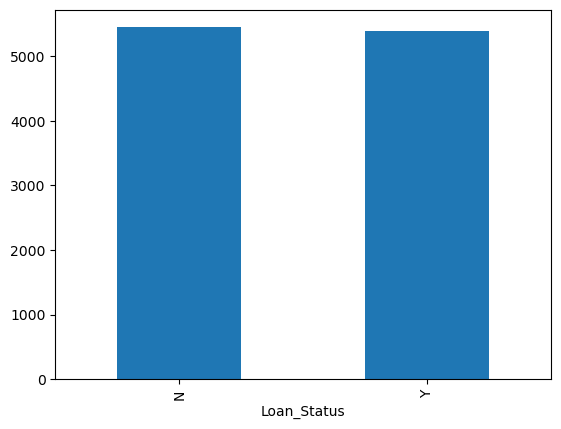

In [21]:
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()
# mean income of people for which the loan has not been approved

- y-axis represents the mean applicant income
- since there is no diff in mean therefore now we make bins for the applicant income variable based on the values in it and analyze the corresponding loan status for each bin.<br>
- **''Binning''** is a process of transforming continuous numerical variables into discrete categorical 'bins', for grouped analysis.

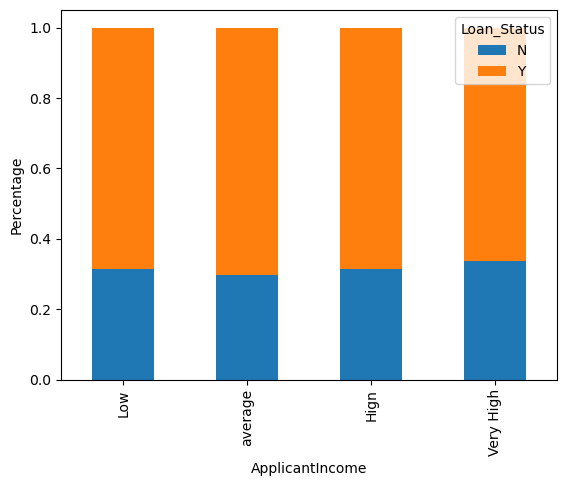

In [22]:
bins = [0, 2500, 4000, 6000, 81000]
groups = ['Low', 'average', 'Hign', 'Very High']
train["Income_bin"] = pd.cut(train['ApplicantIncome'], bins, labels=groups)
Income_bin = pd.crosstab(train['Income_bin'], train['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float),
               axis=0).plot(kind='bar', stacked=True)
plt.xlabel('ApplicantIncome')
p=plt.ylabel('Percentage')
plt.show()

### **Binning** 
Added a new column in the dataset called ApplicantIncome_bin. It categorized the applicant income based on the values into 4 bins or categories.

In [24]:
# print(train)

      Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0         NaN           

Now it can be inferred from the above plot that applicant's income does not affect the chances of loan approval which contadicts our hypothesis that high applicant income mean high chances of loan approval.

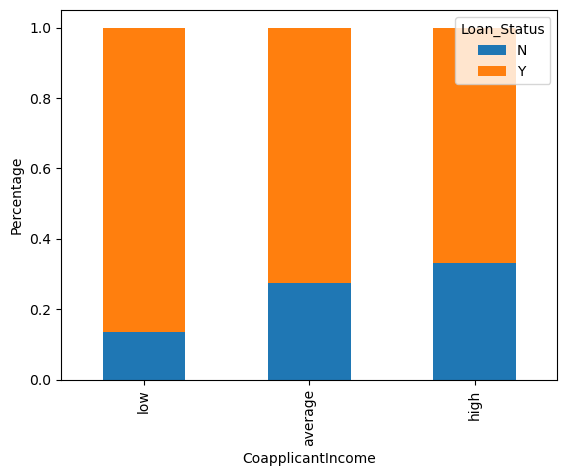

In [25]:
# now analyze the co-applicant income and loan amount variable in a similar mannar.

bins=[0,1000,3000,42000]
groups=['low','average','high']
train['Coapplicant_Income_bin']=pd.cut(train['CoapplicantIncome'],bins,labels=groups)
Coapplicant_Income_bin=pd.crosstab(train['Coapplicant_Income_bin'],train['Loan_Status'])
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
plt.xlabel('CoapplicantIncome')
p=plt.ylabel('Percentage')

- It can be inferred that people with low coapplicant income have high chances of loan approval. But it does not look right. The possible reason behind this may be that most of the applicants don't have any coapplicant so the coapplicant income for such applicants is 0 and hence the loan approval is not dependent on it.So we can make a new variable in which we will combine the applicant's and  coapplicant's income to visualize the combined effect of income on loan approval.